# Module 1 Project
## Ben Geissel & Andrew Cole
### The Movie Database - Insights

In [19]:
# Import libraries with proper aliases
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv
import tmdb_clean
import bom_clean

In [6]:
# Utilize Clean function from tmdb_clean.py file
tmdb_budgets_df = tmdb_clean.clean('tn.movie_budgets.csv.gz')

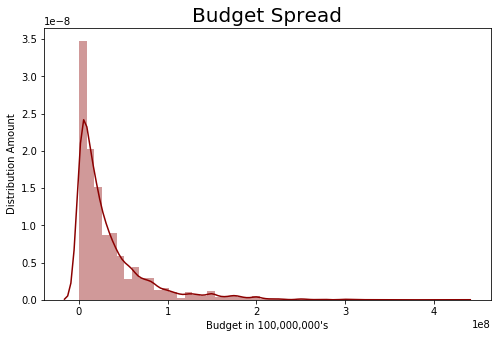

In [18]:
# Check distribution of budgets in order to make proper bins
fig = plt.figure(figsize = (8,5))
sns.distplot(tmdb_budgets_df.production_budget, bins = 50, color = 'darkred', kde = True);
plt.xlabel("Budget in 100,000,000's")
plt.ylabel('Distribution Amount')
plt.title('Budget Spread', fontsize = 20)
plt.show()
#Many smaller budgets than large budgets

In [7]:
# Create columns for Return on Investment for both Domestic and Worldwide
tmdb_budgets_df['Gross_ROI'] = ((tmdb_budgets_df.domestic_gross - tmdb_budgets_df.production_budget) / 
                                tmdb_budgets_df.production_budget)
tmdb_budgets_df['Worldwide_ROI'] = ((tmdb_budgets_df.worldwide_gross - tmdb_budgets_df.production_budget) / 
                                    tmdb_budgets_df.production_budget)

In [8]:
# Create Pivot Tables for both Domestic and Worldwide ROI
tmdb_budgets_domestic_pivot_df = pd.pivot_table(tmdb_budgets_df, index = 'movie_date',
                                              columns = 'binned_budget',
                                              values = 'Gross_ROI',
                                               aggfunc = 'sum')

tmdb_budgets_worldwide_pivot_df = pd.pivot_table(tmdb_budgets_df, index = 'movie_date',
                                              columns = 'binned_budget',
                                              values = 'Worldwide_ROI',
                                               aggfunc = 'sum')

In [9]:
# Create a Series of the mean ROI by binned budget for both domestic and worldwide
domestic_roi_by_budget = tmdb_budgets_domestic_pivot_df.mean()

worldwide_roi_by_budget = tmdb_budgets_worldwide_pivot_df.mean()

In [11]:
# Create an equivalent dictionary to the series generated above. These will be used for plotting.
worldwide_roi_dict = {}
for label in tmdb_budgets_worldwide_pivot_df.columns:
    worldwide_roi_dict[str(label)] = worldwide_roi_by_budget[label]

domestic_roi_dict = {}
for label in tmdb_budgets_domestic_pivot_df.columns:
    domestic_roi_dict[str(label)] = domestic_roi_by_budget[label]

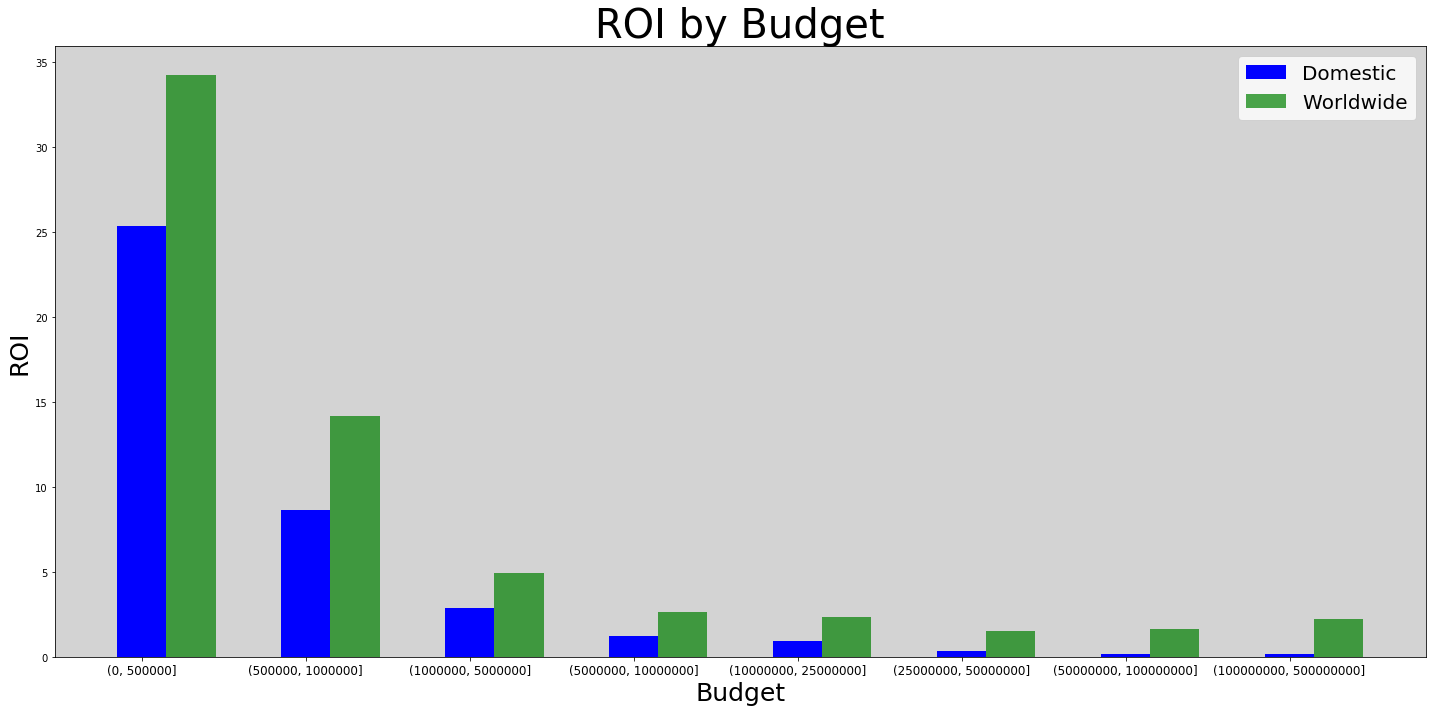

In [13]:
# Create a barplot to show domestic and worldwide ROI compared to Budget Bin
fig = plt.figure(figsize=(20, 10))
X = np.arange(len(domestic_roi_dict))
ax = plt.subplot(111)
ax.set_facecolor('lightgray')
ax.bar(X, domestic_roi_dict.values(), width=0.3, color='b')
ax.bar(X+0.3, worldwide_roi_dict.values(), width=0.3, color='g', alpha = .7)
ax.legend(('Domestic','Worldwide'), fontsize = 20)
plt.xticks(X, domestic_roi_dict.keys(), fontsize = 12)
plt.title("ROI by Budget", fontsize=40)
plt.ylabel('ROI', fontsize = 25)
plt.xlabel('Budget', fontsize = 25)
plt.tight_layout()
plt.show()

### Box Office Mojo - Insights

In [20]:
# Utilize Clean function from bom_clean.py file
bom_df = bom_clean.clean('bom.movie_gross.csv.gz')

In [21]:
# Group bom_df by studio to see the mean domestic gross value by studio
bom_studio_grouped_df = bom_df.groupby(by = 'studio', axis = 0).mean()

In [24]:
# Sort values of the grouped dataframe and take the first 10 values for plotting
bom_studio_grouped_topten_df = bom_studio_grouped_df.sort_values('domestic_gross',
                                                                 ascending = False)[:10]['domestic_gross']

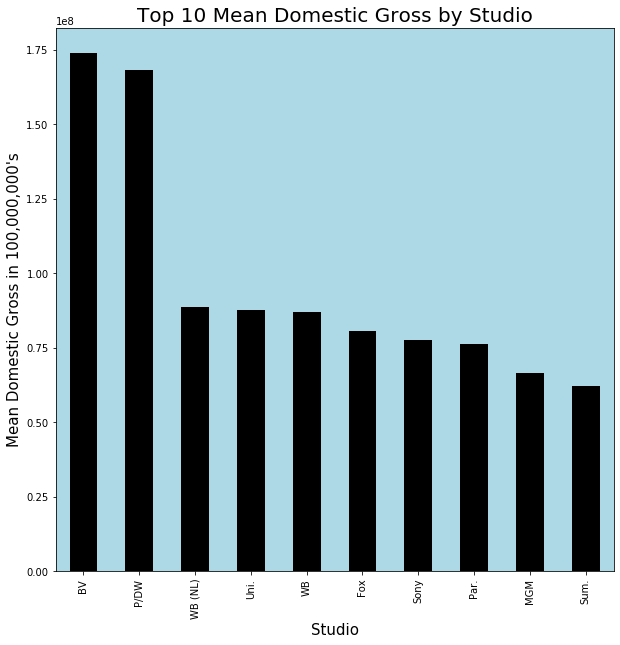

In [27]:
# Plot top 10 studios for mean domestic gross in a barplot
fig = plt.figure(figsize = (10,10), facecolor = 'w')
ax = fig.add_subplot(1,1,1)
ax.set_facecolor('lightblue')
bom_studio_grouped_topten_df.plot(kind = 'bar', color = 'black')
plt.xlabel('Studio', fontsize = 15)
plt.ylabel("Mean Domestic Gross in 100,000,000's", fontsize = 15)
plt.title('Top 10 Mean Domestic Gross by Studio', fontsize = 20)
plt.show()